In [1]:
import tensorflow as tf
import numpy as np
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import fashion_mnist
import datetime
import os

In [2]:
# =========================
# 1) Load & preprocess Fashion MNIST
# =========================
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

# Normalize
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# Flatten (MLP)
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

# One-hot encode labels (we have 10 classes)
num_classes = 10
train_y_cat = tf.keras.utils.to_categorical(train_y, num_classes)
test_y_cat  = tf.keras.utils.to_categorical(test_y, num_classes)

print("train_X.shape:", train_X.shape, "train_y_cat.shape:", train_y_cat.shape)


train_X.shape: (60000, 784) train_y_cat.shape: (60000, 10)


In [3]:
import tensorflow as tf
import os, datetime, time

def build_model(activation='relu'):
    a = activation.lower().replace('-', '').replace('_', '')
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(784,)))

    if a == 'relu':
        model.add(tf.keras.layers.Dense(128, activation='relu'))
        model.add(tf.keras.layers.Dense(64, activation='relu'))

    elif a in ('leakyrelu', 'leaky', 'leakyrel'):
        model.add(tf.keras.layers.Dense(128))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
        model.add(tf.keras.layers.Dense(64))
        model.add(tf.keras.layers.LeakyReLU(alpha=0.1))

    else:
        raise ValueError(f"Unknown activation: {activation}")

    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

# تأكد انك تعرف activations_to_test
activations_to_test = ['relu', 'leaky']  # الآن 'leaky' سيعمل


In [4]:
# =========================
# 3) Experiment setup: optimizers + activations + training params
# =========================
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001)
}

histories_opt = {}


In [5]:
base_log_dir = "C:/Users/Mgama/Ai_Amit_Diploma/learning_Amit/DLWorkShop/logs_test"
os.makedirs(base_log_dir, exist_ok=True)


In [6]:
# =========================
# 4) Compare Optimizers (using ReLU)
#    Keep everything else fixed.
# =========================

EPOCHS = 10
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

histories_opt = {}
results_opt = []

optimizers_to_test = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001)
}

for opt_name, optimizer in optimizers_to_test.items():
    print(f"\n🔹 Training with optimizer: {opt_name}")

    tf.keras.backend.clear_session()
    model = build_model(activation='relu')

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(
        train_X, train_y_cat,
        validation_data=(test_X, test_y_cat),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1
    )
    elapsed = time.time() - start

    # ✅ احفظ الـ history هنا
    histories_opt[opt_name] = history

    test_loss, test_acc = model.evaluate(test_X, test_y_cat, verbose=0)

    results_opt.append({
        'experiment': 'optimizer',
        'optimizer': opt_name,
        'test_accuracy': float(test_acc),
        'test_loss': float(test_loss),
        'train_time_sec': elapsed
    })







🔹 Training with optimizer: SGD

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6388 - loss: 1.1339 - val_accuracy: 0.7393 - val_loss: 0.7636
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7766 - loss: 0.6705 - val_accuracy: 0.7812 - val_loss: 0.6347
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8043 - loss: 0.5797 - val_accuracy: 0.8024 - val_loss: 0.5730
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8171 - loss: 0.5336 - val_accuracy: 0.8051 - val_loss: 0.5520
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8268 - loss: 0.5058 - val_accuracy: 0.8067 - val_loss: 0.5354
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8319 - loss: 0.4864 - val_accuracy: 0.8152 - val_loss: 0.5267
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8372 - loss: 0.4711 - val_accuracy: 0.8105 - val_loss: 0.5221
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8411 

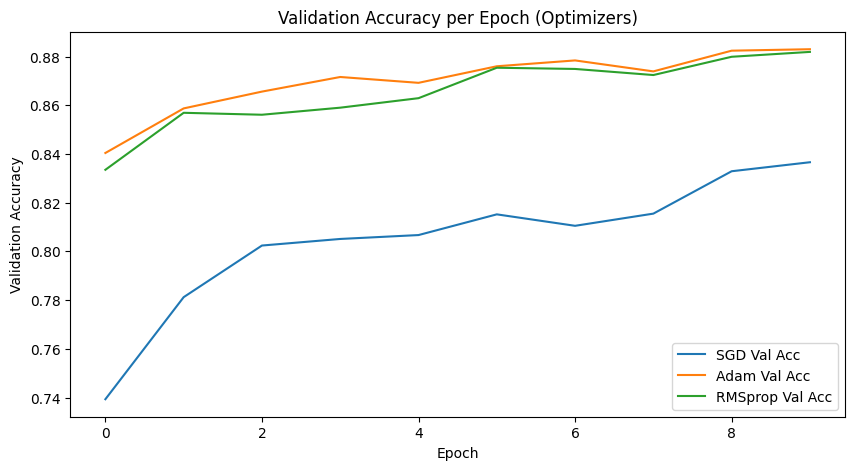

In [7]:
plt.figure(figsize=(10,5))
for opt_name, history in histories_opt.items():
    plt.plot(history.history['val_accuracy'], label=f'{opt_name} Val Acc')  # ✅ label مضافة هنا
plt.title('Validation Accuracy per Epoch (Optimizers)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


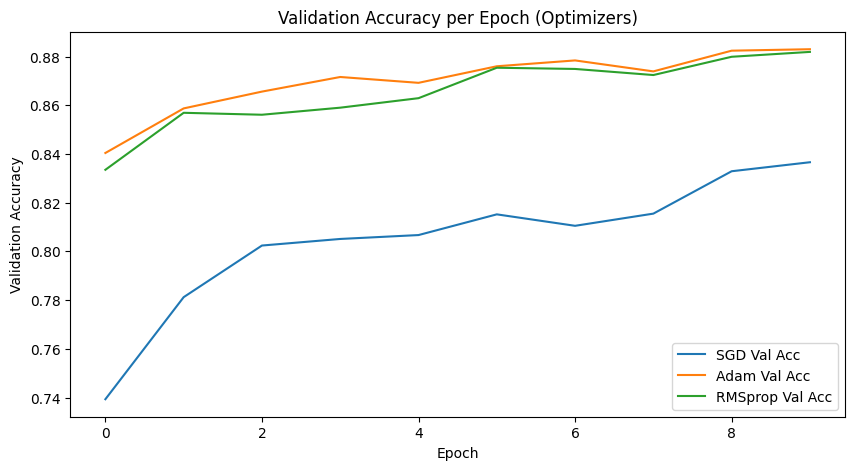

In [8]:
plt.figure(figsize=(10,5))
for opt_name, history in histories_opt.items():
    plt.plot(history.history['val_accuracy'], label=f'{opt_name} Val Acc')  # ✅ label مضافة هنا
plt.title('Validation Accuracy per Epoch (Optimizers)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


In [9]:
# =========================
# إعدادات التدريب العامة
# =========================
EPOCHS = 10
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.2

# =========================
# مقارنة دوال التنشيط باستخدام Adam
# =========================
activations_to_test = ['relu', 'leaky']
results_act = []
histories_act = {}

for act in activations_to_test:
    tf.keras.backend.clear_session()
    model = build_model(act)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # 🔹 فولدر منفصل لكل activation
    log_dir = os.path.join(base_log_dir, f"activation_{act}_{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}")
    tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    print(f"\n🔹 Training with activation: {act.upper()}")
    start = time.time()
    history = model.fit(
        train_X, train_y_cat,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=VALIDATION_SPLIT,
        verbose=1,
        callbacks=[tensorboard_cb]
    )
    elapsed = time.time() - start
    
    test_loss, test_acc = model.evaluate(test_X, test_y_cat, verbose=0)
    
    results_act.append({
        'experiment': 'activation',
        'activation': act,
        'test_accuracy': float(test_acc),
        'test_loss': float(test_loss),
        'train_time_sec': elapsed
    })
    histories_act[act] = history



🔹 Training with activation: RELU
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8004 - loss: 0.5719 - val_accuracy: 0.8506 - val_loss: 0.4269
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8559 - loss: 0.4028 - val_accuracy: 0.8657 - val_loss: 0.3802
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8712 - loss: 0.3567 - val_accuracy: 0.8736 - val_loss: 0.3547
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8803 - loss: 0.3296 - val_accuracy: 0.8767 - val_loss: 0.3434
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8852 - loss: 0.3127 - val_accuracy: 0.8689 - val_loss: 0.3559
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8899 - loss: 0.2958 - val_accuracy: 0.8731 - val_loss: 0.3476
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8921 - loss: 0.2869 - val_accuracy: 0.8804 - val_loss: 0.3281
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9014

C:\Users\Mgama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8040 - loss: 0.5633 - val_accuracy: 0.8443 - val_loss: 0.4348
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8562 - loss: 0.4041 - val_accuracy: 0.8601 - val_loss: 0.3891
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8700 - loss: 0.3585 - val_accuracy: 0.8706 - val_loss: 0.3630
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8785 - loss: 0.3366 - val_accuracy: 0.8763 - val_loss: 0.3486
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8835 - loss: 0.3166 - val_accuracy: 0.8771 - val_loss: 0.3484
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8898 - loss: 0.2964 - val_accuracy: 0.8769 - val_loss: 0.3407
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8951 - loss: 0.2844 - val_accuracy: 0.8794 - val_loss: 0.3334
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8975 - loss: 0.2771 - val_accuracy: 0.8804 - val_

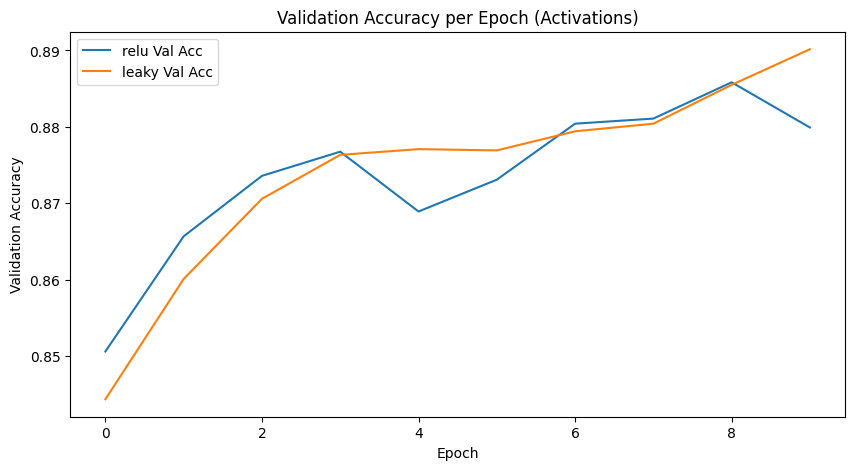

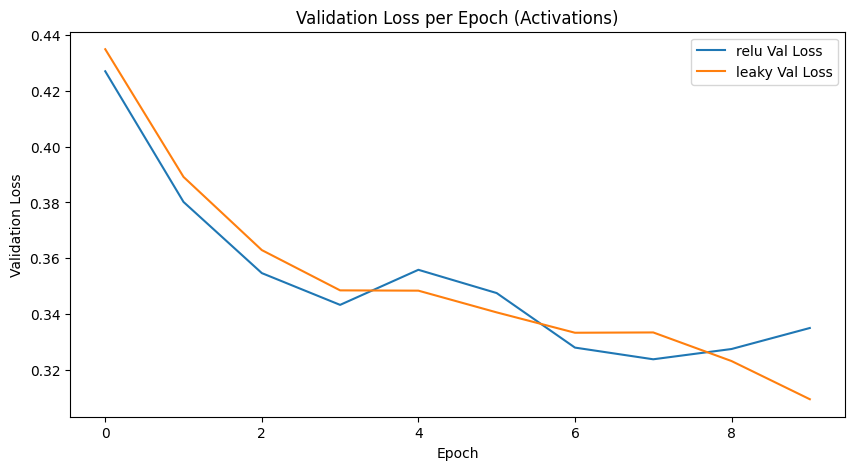

In [10]:
# =========================
# 7) Plot activation comparison (val accuracy & val loss)
# =========================
plt.figure(figsize=(10,5))
for act, history in histories_act.items():
    label = act if isinstance(act, str) else 'leaky'
    plt.plot(history.history['val_accuracy'], label=f'{label} Val Acc')
plt.title('Validation Accuracy per Epoch (Activations)')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
for act, history in histories_act.items():
    label = act if isinstance(act, str) else 'leaky'
    plt.plot(history.history['val_loss'], label=f'{label} Val Loss')
plt.title('Validation Loss per Epoch (Activations)')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()


In [11]:
# =========================
# 8) Aggregate & show table of results
# =========================
df_opt = pd.DataFrame(results_opt)
df_act = pd.DataFrame(results_act)

print("=== Optimizers summary ===")
display(df_opt.sort_values('test_accuracy', ascending=False))

print("=== Activations summary ===")
display(df_act.sort_values('test_accuracy', ascending=False))


=== Optimizers summary ===


,experiment,optimizer,test_accuracy,test_loss,train_time_sec
1,optimizer,Adam,0.8830,0.327290,21.907921
2,optimizer,RMSprop,0.8819,0.326444,21.093976
0,optimizer,SGD,0.8366,0.465859,17.970066


=== Activations summary ===


,experiment,activation,test_accuracy,test_loss,train_time_sec
1,activation,leaky,0.8817,0.335813,20.514111
0,activation,relu,0.8712,0.355449,22.213633


In [12]:
# =========================
# 9) Generate short analysis paragraph automatically
#    (will use the best test_accuracy entries)
# =========================
best_opt = df_opt.sort_values('test_accuracy', ascending=False).iloc[0]
best_act = df_act.sort_values('test_accuracy', ascending=False).iloc[0]

paragraph = f"""
In this experiment on Fashion-MNIST (simple MLP), the best optimizer was {best_opt['optimizer']} 
with test accuracy = {best_opt['test_accuracy']:.4f} and test loss = {best_opt['test_loss']:.4f}. 
This optimizer likely performed best because it adapts the learning rate per-parameter and 
handles noisy gradients well (helping faster convergence). For activation functions, {best_act['activation']} 
achieved test accuracy = {best_act['test_accuracy']:.4f}; it helped the network converge {'faster and more stably' if best_act['activation']=='leaky' else 'quickly'}.
"""
print(paragraph)



In this experiment on Fashion-MNIST (simple MLP), the best optimizer was Adam 
with test accuracy = 0.8830 and test loss = 0.3273. 
This optimizer likely performed best because it adapts the learning rate per-parameter and 
handles noisy gradients well (helping faster convergence). For activation functions, leaky 
achieved test accuracy = 0.8817; it helped the network converge faster and more stably.



In [13]:
# =========================
# 10) Optional extension: add Dropout and compare (one quick run with Adam+ReLU)
# =========================
def build_model_with_dropout(activation_mode='relu', dropout_rate=0.3):
    model = models.Sequential()
    if activation_mode == 'leaky':
        model.add(layers.Dense(128, input_shape=(784,)))
        model.add(layers.LeakyReLU(alpha=0.1))
        model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(64))
        model.add(layers.LeakyReLU(alpha=0.1))
        model.add(layers.Dropout(dropout_rate))
    else:
        model.add(layers.Dense(128, activation='relu', input_shape=(784,)))
        model.add(layers.Dropout(dropout_rate))
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# quick test
tf.keras.backend.clear_session()
m = build_model_with_dropout('relu', 0.3)
m.compile(optimizer=tf.keras.optimizers.Adam(0.001),
          loss='categorical_crossentropy',
          metrics=['accuracy'])
h = m.fit(train_X, train_y_cat, epochs=6, batch_size=BATCH_SIZE,
          validation_split=VALIDATION_SPLIT, verbose=1)
test_loss, test_acc = m.evaluate(test_X, test_y_cat, verbose=0)
print("Dropout test acc:", test_acc)



Epoch 1/6


C:\Users\Mgama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7338 - loss: 0.7561 - val_accuracy: 0.8322 - val_loss: 0.4627
Epoch 2/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8229 - loss: 0.4983 - val_accuracy: 0.8488 - val_loss: 0.4186
Epoch 3/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8402 - loss: 0.4489 - val_accuracy: 0.8607 - val_loss: 0.3843
Epoch 4/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8500 - loss: 0.4176 - val_accuracy: 0.8661 - val_loss: 0.3651
Epoch 5/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8584 - loss: 0.3964 - val_accuracy: 0.8673 - val_loss: 0.3564
Epoch 6/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8630 - loss: 0.3812 - val_accuracy: 0.8765 - val_loss: 0.3486
Dropout test acc: 0.8654999732971191


In [14]:
# =========================
# مقارنة بين الشبكة بدون Dropout و بالشبكة مع Dropout
# =========================

# 🔹 أولاً: نموذج بدون Dropout
m_no_drop = build_model('relu')
m_no_drop.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
h_no_drop = m_no_drop.fit(train_X, train_y_cat,
                          epochs=6,
                          batch_size=BATCH_SIZE,
                          validation_split=VALIDATION_SPLIT,
                          verbose=1)
loss_no, acc_no = m_no_drop.evaluate(test_X, test_y_cat, verbose=0)

# 🔹 عرض مقارنة النتائج
print(f"\nWithout Dropout acc: {acc_no:.4f}")
print(f"With Dropout acc:    {test_acc:.4f}")


Epoch 1/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8036 - loss: 0.5678 - val_accuracy: 0.8282 - val_loss: 0.4775
Epoch 2/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8557 - loss: 0.4044 - val_accuracy: 0.8597 - val_loss: 0.3878
Epoch 3/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8687 - loss: 0.3628 - val_accuracy: 0.8657 - val_loss: 0.3705
Epoch 4/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8769 - loss: 0.3358 - val_accuracy: 0.8729 - val_loss: 0.3500
Epoch 5/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8853 - loss: 0.3122 - val_accuracy: 0.8755 - val_loss: 0.3449
Epoch 6/6
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8889 - loss: 0.3020 - val_accuracy: 0.8774 - val_loss: 0.3408

Without Dropout acc: 0.8692
With Dropout acc:    0.8655


In [20]:
%load_ext tensorboard
%tensorboard --logdir "C:/Users/Mgama/Ai_Amit_Diploma/learning_Amit/DLWorkShop/logs_test" --port 6005


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
